In [1]:
import cv2
import math
import pywt
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

import os
import sys  
sys.path.insert(0, 'G:\\My Drive\\Colab Notebooks\\MWCNN')

from Layers.DMWT import *
from utils.mse import mse
from utils.cast import *

In [2]:
img_orig = cv2.imread("../input/Lenna_orig.png",1)
img_ex = np.expand_dims(img_orig, axis=0)
input_shape = img_orig.shape

In [3]:
model = keras.Sequential()
model.add(keras.Input(shape=input_shape))
model.add(DMWT())
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dmwt (DMWT)                  (1, 1024, 1024, 3)        0         
Total params: 0
Trainable params: 0
Non-trainable params: 0
_________________________________________________________________


In [4]:
coeffs = model.predict(img_ex)
coeffs.shape

(1, 1024, 1024, 3)

In [5]:
data = tf.image.convert_image_dtype(coeffs[0, ..., :], dtype=tf.float32)
with tf.Session() as sess:
    data = sess.run(data)


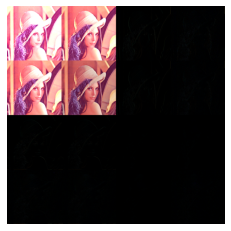

In [6]:
plt.imshow(cv2.cvtColor(cast_like_matlab_uint8_2d_rgb(data), cv2.COLOR_BGR2RGB))
plt.axis("off")
plt.show()

In [7]:
model = keras.Sequential()
model.add(keras.Input(shape=input_shape))
model.add(DMWT())
model.add(IDMWT())
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dmwt_1 (DMWT)                (1, 1024, 1024, 3)        0         
_________________________________________________________________
idmwt (IDMWT)                (1, 512, 512, 3)          0         
Total params: 0
Trainable params: 0
Non-trainable params: 0
_________________________________________________________________


In [8]:
coeffs = model.predict(img_ex)
coeffs.shape

(1, 512, 512, 3)

In [9]:
data = tf.image.convert_image_dtype(coeffs[0, ..., :], dtype=tf.float32)
with tf.Session() as sess:
    data = sess.run(data)


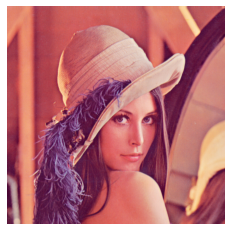

In [10]:
plt.imshow(cv2.cvtColor(cast_like_matlab_uint8_2d_rgb(data), cv2.COLOR_BGR2RGB))
plt.axis("off")
plt.show()


In [11]:
recon_out = tf_rgb_to_ndarray(coeffs)
print("MSE: Orig Reconstructed: ",mse(recon_out,img_orig))


MSE: Orig Reconstructed:  4.313300723535196e-10
